Importing the Dependencies

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Data Collection & Analysis

In [244]:
##loadong the data from csv file to a Pandas Dataframe
customer_data = pd.read_csv('CustomerDataset.csv')

##first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Female,29,499,85
1,2,Female,21,208,81
2,3,Female,27,300,48
3,4,Female,26,458,29
4,5,Male,57,221,4


In [245]:
##finding the nember of rows and columns
customer_data.shape

(200, 5)

In [246]:
##getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [247]:
##checking for missing values
customer_data.isnull().sum()


CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

Choosing the Annual Income & Spending Score

In [248]:
X =customer_data.iloc[:,[3,4]].values

In [249]:
print(X)

[[499  85]
 [208  81]
 [300  48]
 [458  29]
 [221   4]
 [304  53]
 [671  68]
 [493  97]
 [446  36]
 [135  68]
 [401  49]
 [328  39]
 [418  44]
 [186  88]
 [432  63]
 [256  30]
 [283  48]
 [489  17]
 [311  59]
 [468   4]
 [556  17]
 [504  21]
 [346  53]
 [144  98]
 [633  30]
 [533   9]
 [434  42]
 [668  85]
 [194  19]
 [505  79]
 [414  43]
 [819  26]
 [123  14]
 [209  92]
 [368  56]
 [427  55]
 [438  96]
 [246  41]
 [884  22]
 [315  55]
 [570  13]
 [497  78]
 [158  29]
 [388  51]
 [507   1]
 [630  92]
 [347  41]
 [409  50]
 [262  45]
 [578  90]
 [579  15]
 [299  53]
 [512  22]
 [499   5]
 [122  92]
 [384  49]
 [315  47]
 [115  99]
 [339  38]
 [525  93]
 [253  51]
 [363  48]
 [290  42]
 [342  52]
 [487  94]
 [ 95  81]
 [491  67]
 [896  82]
 [417  42]
 [279  65]
 [453  58]
 [390  47]
 [130  72]
 [397  48]
 [405  54]
 [297  50]
 [653  64]
 [510  79]
 [402  48]
 [133  10]
 [412  44]
 [631  86]
 [785  79]
 [409  59]
 [250  75]
 [563  69]
 [252  39]
 [ 93  11]
 [617  90]
 [773  11]
 [481   7]

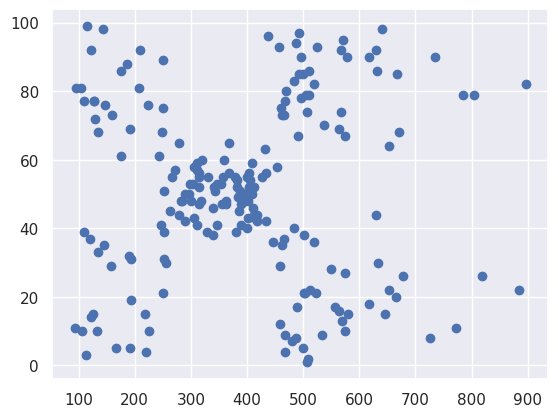

In [250]:
plt.scatter(customer_data['Income'],customer_data['SpendingScore'])

Scalering Dataset

In [251]:
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [252]:
print(X)

[[0.50560399 0.85714286]
 [0.14321295 0.81632653]
 [0.25778331 0.47959184]
 [0.45454545 0.28571429]
 [0.15940224 0.03061224]
 [0.26276463 0.53061224]
 [0.71980075 0.68367347]
 [0.498132   0.97959184]
 [0.43960149 0.35714286]
 [0.05230386 0.68367347]
 [0.38356164 0.48979592]
 [0.29265255 0.3877551 ]
 [0.40473225 0.43877551]
 [0.11581569 0.8877551 ]
 [0.42216687 0.63265306]
 [0.20298879 0.29591837]
 [0.2366127  0.47959184]
 [0.49315068 0.16326531]
 [0.27148194 0.59183673]
 [0.46699875 0.03061224]
 [0.5765878  0.16326531]
 [0.51183064 0.20408163]
 [0.31506849 0.53061224]
 [0.06351183 0.98979592]
 [0.67247821 0.29591837]
 [0.54794521 0.08163265]
 [0.42465753 0.41836735]
 [0.71606476 0.85714286]
 [0.12577833 0.18367347]
 [0.51307597 0.79591837]
 [0.39975093 0.42857143]
 [0.90410959 0.25510204]
 [0.0373599  0.13265306]
 [0.14445828 0.92857143]
 [0.34246575 0.56122449]
 [0.41594022 0.55102041]
 [0.42963885 0.96938776]
 [0.19053549 0.40816327]
 [0.98505604 0.21428571]
 [0.27646326 0.55102041]


Choosing the number of clusters

In [253]:
##finding wcss value for different number of clusters

wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++',n_init='auto',random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

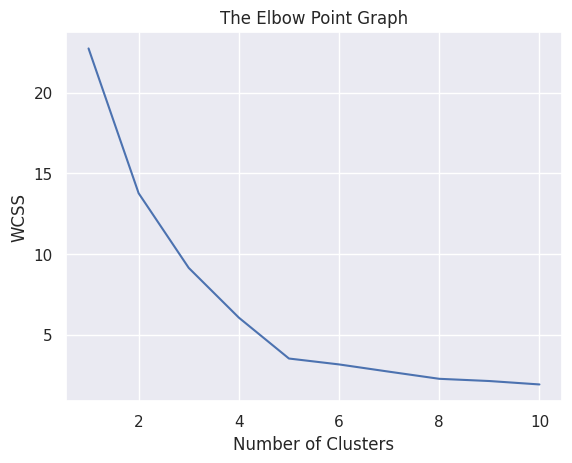

In [254]:
##plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

Opimum Number of Clusters=5

Training the k-Means Clustering Model

In [255]:
kmeans=KMeans(n_clusters=5,init='k-means++',n_init = 'auto',random_state=0)

#return a label for each data point based on their cluster
Y=kmeans.fit_predict(X)

print(Y)

[2 0 1 3 4 1 2 2 1 0 1 1 1 0 1 4 1 3 1 3 3 3 1 0 3 3 1 2 4 2 1 3 4 0 1 1 2
 1 3 1 3 2 4 1 3 2 1 1 1 2 3 1 3 3 0 1 1 0 1 2 1 1 1 1 2 0 2 2 1 1 1 1 0 1
 1 1 2 2 1 4 1 2 2 1 0 2 1 4 2 3 3 3 1 3 4 1 1 0 4 1 4 1 0 4 2 4 1 1 4 1 4
 1 0 4 1 1 2 3 2 1 1 2 3 2 3 3 1 2 1 3 0 4 4 2 1 3 4 1 2 1 4 0 1 1 1 0 1 1
 2 1 0 1 1 3 3 1 3 1 2 0 2 1 3 2 3 1 2 2 2 1 2 1 0 0 0 1 3 3 1 1 3 2 1 2 4
 1 3 2 1 4 4 1 1 1 2 3 0 1 1 1]


Visualizing all the Clusters

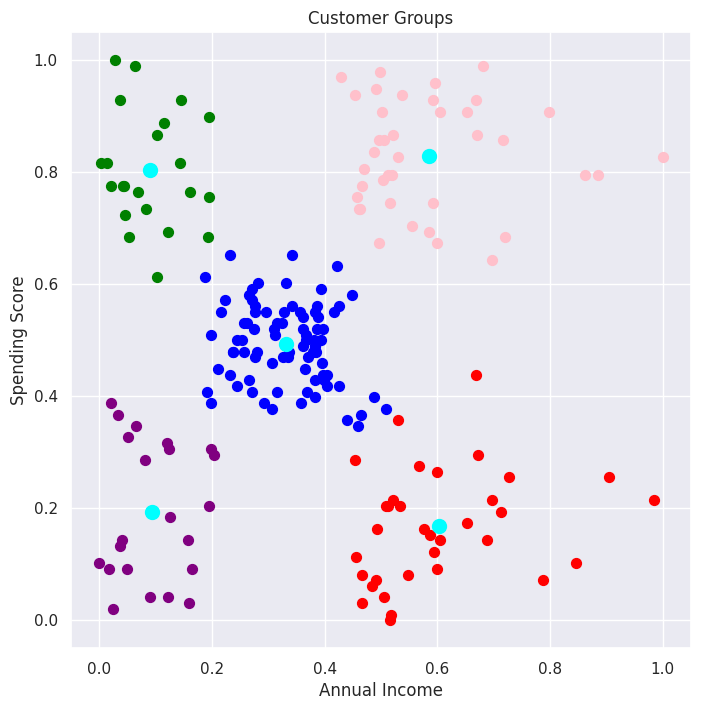

In [256]:
##plotting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluter 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='blue',label='Cluter 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='pink',label='Cluter 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='red',label='Cluter 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='purple',label='Cluter 5')

##plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()